Clustering Assignment

Q1. This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking.

Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

In [5]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [9]:
df0_125.head()

,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a


Make scatterplots of the (X1, X2) points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

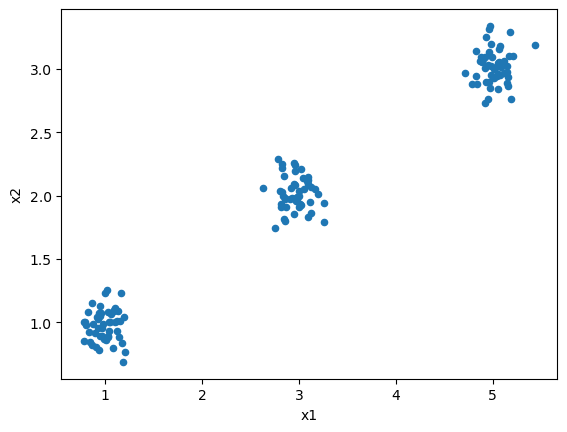

In [11]:
df0_125.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

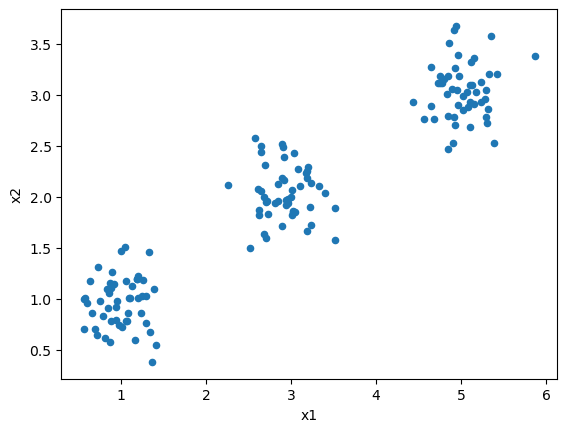

In [13]:
df0_25.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

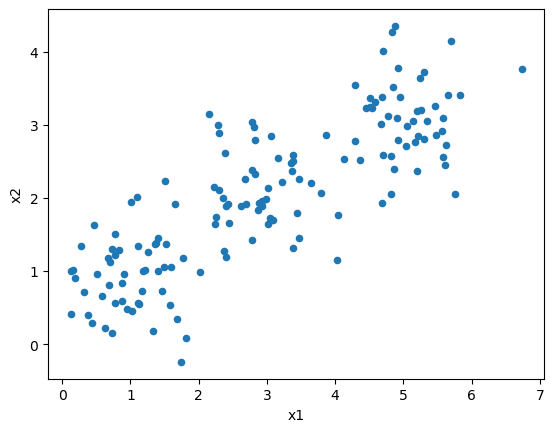

In [15]:
df0_5.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

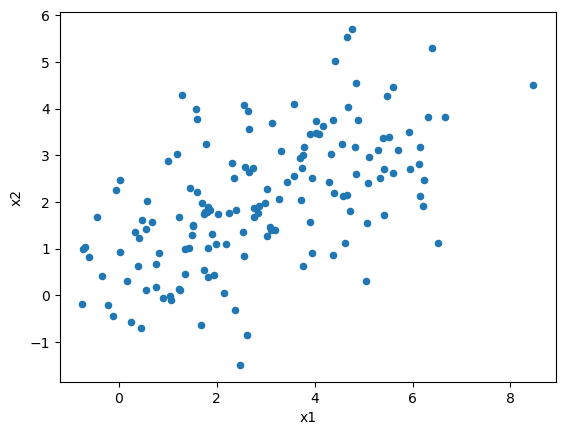

In [17]:
df1_0.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

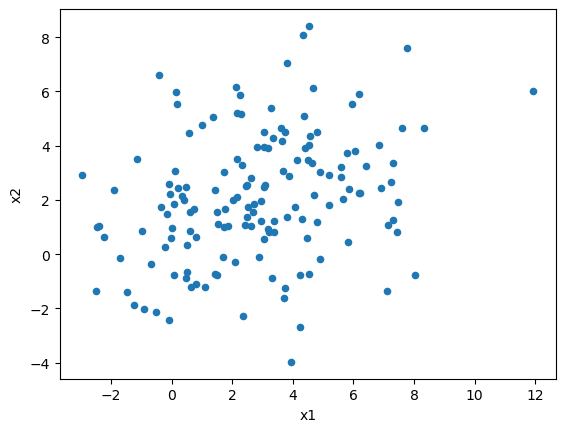

In [19]:
df2_0.plot.scatter(x='x1', y='x2')

As the noise goes up from .125 to 2, the clusters become less and less concentrated

Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a k. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

In [30]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): #max/min function
    x = (x-min(x))/(max(x)-min(x))
    return x
min_x1 = min(df0_125.loc[:,'x2']) #normalize
max_x1 = max(df0_125.loc[:,'x2'])
min_x2 = min(df0_125.loc[:,'x2'])
max_x2 = max(df0_125.loc[:,'x2'])
X = df0_125.loc[ : , ['x2','x1'] ] # get data for clustering
X = X.apply(maxmin)
X.head()

,x2,x1
0,0.061291,0.000000
1,0.091404,0.056226
2,0.072990,0.078001
3,0.078279,0.040235
4,0.122476,0.073387


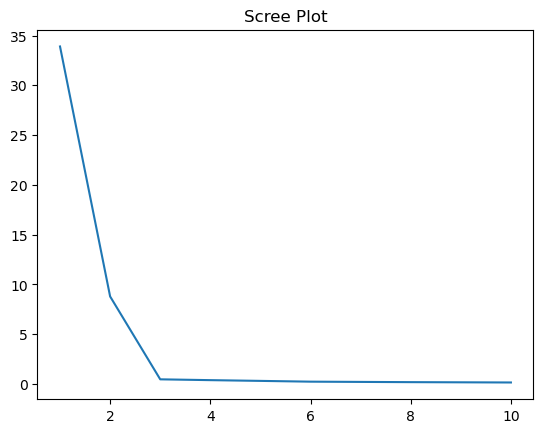

In [34]:
from sklearn.cluster import KMeans
import seaborn as sns # Import kmc

def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x

k_bar = 10 #scree plot
SSE = [] 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(X) 
    SSE.append(model.inertia_) 
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

In [40]:
#repeated above for all versions
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
min_x1 = min(df0_25.loc[:,'x2']) 
max_x1 = max(df0_25.loc[:,'x2'])
min_x2 = min(df0_25.loc[:,'x2'])
max_x2 = max(df0_25.loc[:,'x2'])

X = df0_25.loc[ : , ['x2','x1'] ] 
X = X.apply(maxmin)
X.head()

,x2,x1
0,0.098448,0.000000
1,0.146816,0.098631
2,0.117239,0.136828
3,0.125735,0.070579
4,0.196725,0.128734


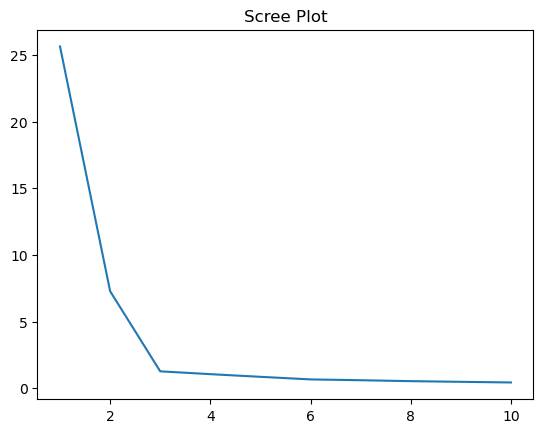

In [42]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
k_bar = 10
SSE = [] 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X) 
    SSE.append(model.inertia_) 
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

In [44]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
min_x1 = min(df0_5.loc[:,'x2']) 
max_x1 = max(df0_5.loc[:,'x2'])
min_x2 = min(df0_5.loc[:,'x2'])
max_x2 = max(df0_5.loc[:,'x2'])

X = df0_5.loc[ : , ['x2','x1'] ] 
X = X.apply(maxmin)
X.head()

,x2,x1
0,0.141269,0.000000
1,0.210676,0.158339
2,0.168234,0.219660
3,0.180425,0.113305
4,0.282294,0.206666


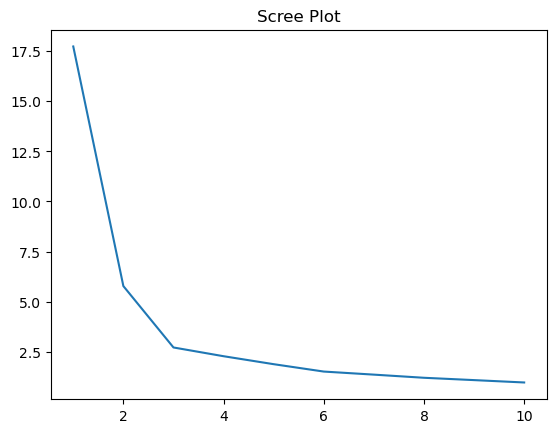

In [46]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
k_bar = 10
SSE = [] 
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(X) 
    SSE.append(model.inertia_) 
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') 

In [52]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
min_x1 = min(df1_0.loc[:,'x2']) 
max_x1 = max(df1_0.loc[:,'x2'])
min_x2 = min(df1_0.loc[:,'x2'])
max_x2 = max(df1_0.loc[:,'x2'])


X = df1_0.loc[ : , ['x2','x1'] ]
X = X.apply(maxmin)
X.head()

,x2,x1
0,0.180532,0.000000
1,0.269228,0.227070
2,0.214991,0.315009
3,0.230570,0.162488
4,0.360750,0.296374


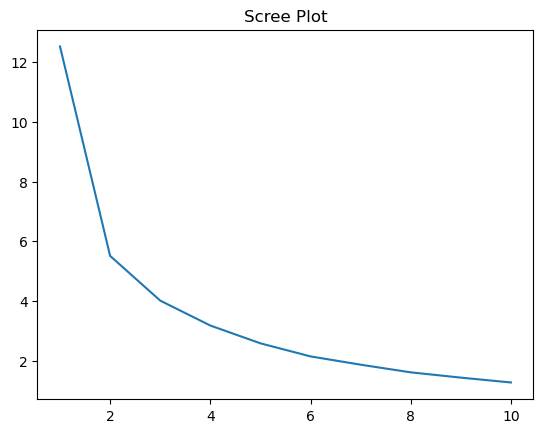

In [54]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
k_bar = 10
SSE = [] 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE.append(model.inertia_)
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') 

In [56]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
min_x1 = min(df2_0.loc[:,'x2']) 
max_x1 = max(df2_0.loc[:,'x2'])
min_x2 = min(df2_0.loc[:,'x2'])
max_x2 = max(df2_0.loc[:,'x2'])

X = df2_0.loc[ : , ['x2','x1'] ]
X = X.apply(maxmin)
X.head()

,x2,x1
0,0.209668,0.030053
1,0.312679,0.311351
2,0.249688,0.420291
3,0.267782,0.231346
4,0.418972,0.397206


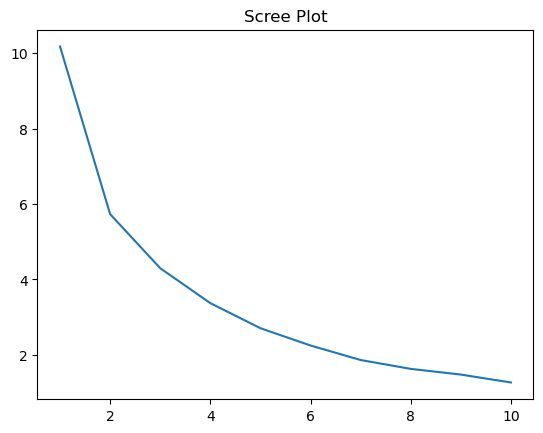

In [58]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x
k_bar = 10
SSE = [] 
for k in range(k_bar): 
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
    model = model.fit(X) 
    SSE.append(model.inertia_) 
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') 

The more "noise" the more round the elbow, which makes it harder to distinguish the best k 

part 4: Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow points to the best k because it is the spot where its no longer margianlly beneficial to keep adding more clusters to get information, that is what the "flattening out" of the elbow tells us. Here we see the noisy the df is to begin with, the harder it is to see where the elbow occurs or even if there is one.

Question 5:

7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

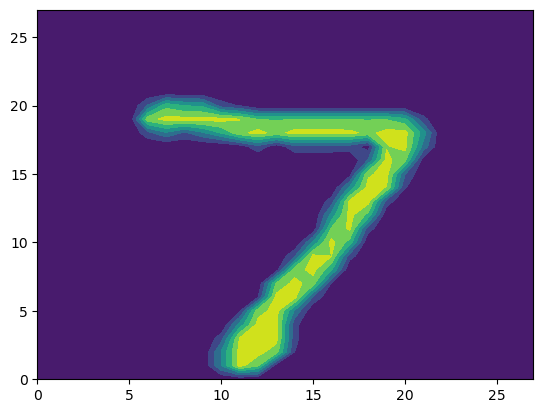

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

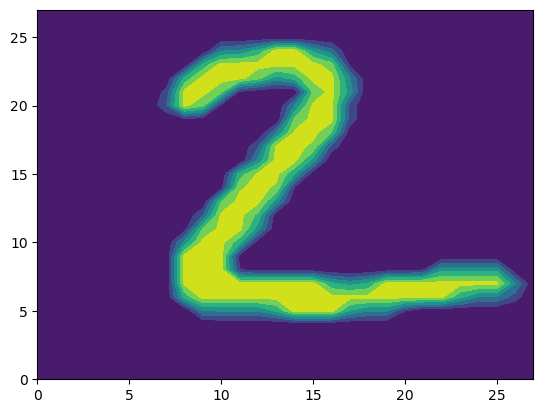

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

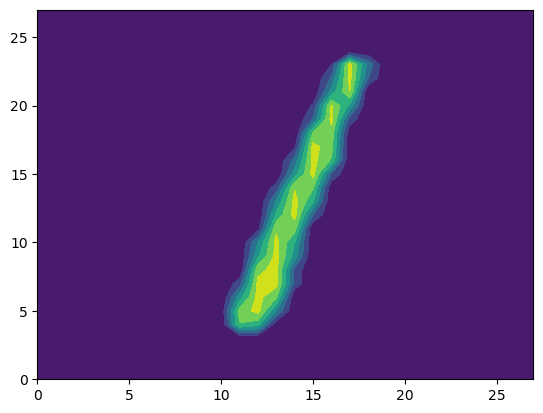

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

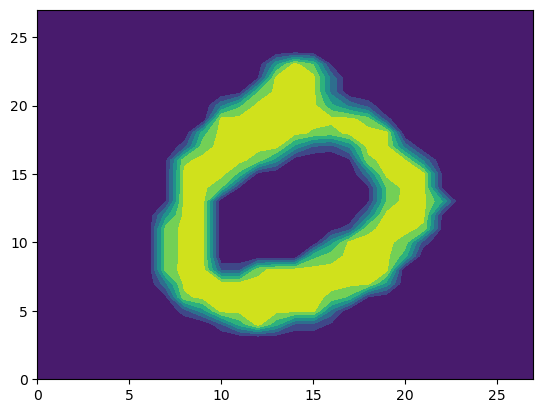

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

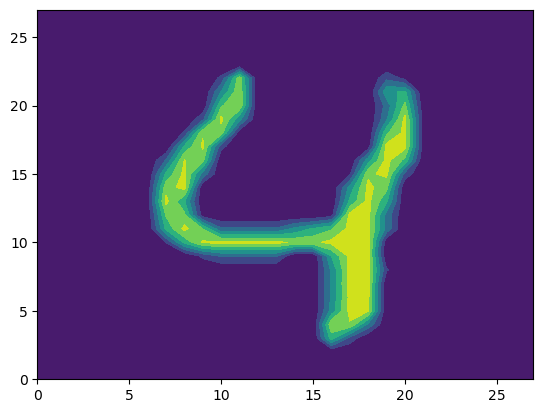

In [62]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

import matplotlib.pyplot as plt
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?

In [64]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)
(28, 28)
(60000,)
(10000,)


Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the index-th element of X_test into a 28x28-length row vector of values, rather than a matrix. Turn X_train into an n *784 matrix X that is suitable for scikit-learn's kNN classifier where is the number of observations and 784 = 28X28 (you could use, for example, a for loop).

In [66]:
Z_train = []
for i in range(60000):
    row = X_train[i].reshape((1,784)) 
    Z_train.append(row[0]) 
Z_train = pd.DataFrame(Z_train)
Z_train.to_csv('./data/Z_train.csv')
Z_test = []
for i in range(len(y_test)):
    row = X_test[i].reshape((1,784))
    Z_test.append(row[0])
Z_test = pd.DataFrame(Z_test)
Z_test.to_csv('./data/Z_test.csv')

In [70]:
Z_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use k means clustering on the reshaped X_test data with k=10.

In [94]:
print(type(df))

<class 'tuple'>


In [122]:
#I was stuck on how to apply kmeans clustering to this new data as it was bigger than ones we did in other examples
#I used ChatGpt and googling to learn that fit

kmeans = KMeans(n_clusters=10, random_state=42)
cluster = kmeans.fit_predict(Z_test)

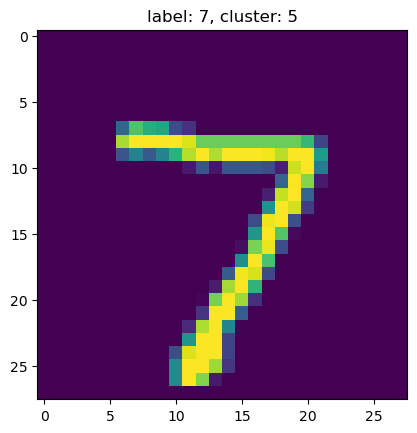

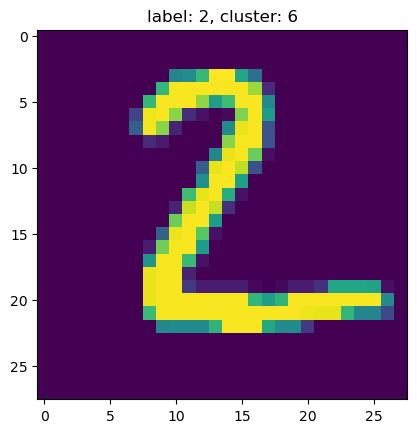

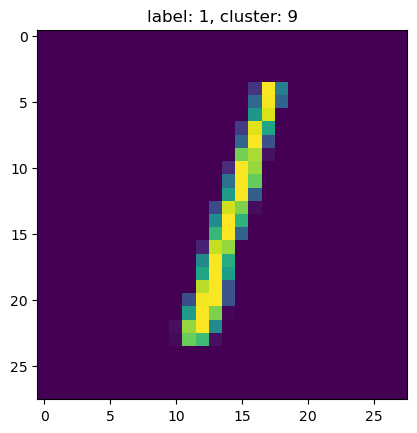

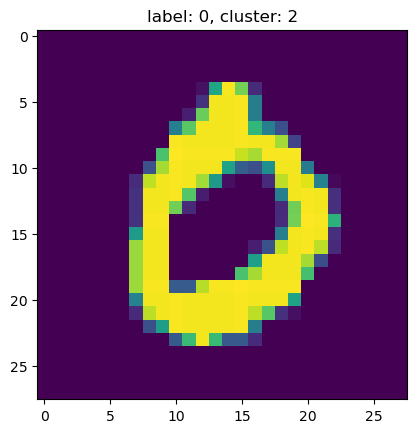

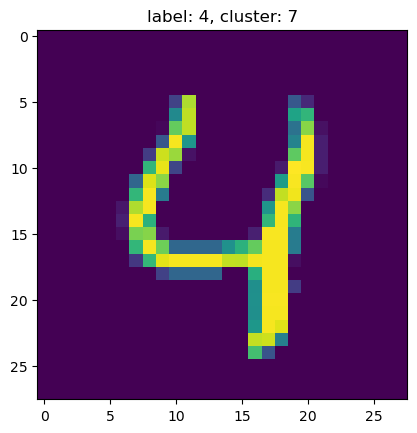

In [132]:
for i in range(5):
    plt.imshow(X_test[i]) 
    plt.title(f"label: {y_test[i]}, cluster: {cluster[i]}")
    plt.show()

In [126]:
crosstab = pd.crosstab(y_test, cluster)
print(crosstab)

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0        0   15  735    2    9    2   50    3  162    2
1      642    1    0    0    1    0    3    0    1  487
2       50   12   11  697   38   14   41   25   28  116
3       52    1    0   33  131   11  709   19   49    5
4       27   27    1    0    3  301    0  549   50   24
5       20    7    3    2  165   53  290   47  271   34
6       18  649   18    7    3    1    4   11  243    4
7       41    0    1   14    2  641    0  271    2   56
8       21    8    9    8  633   35  107   21   88   44
9       23    5    7    3   13  404    8  530    6   10


How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can kMC recover the latent digits 0 to 9, without even knowing what those digits were?

The correspondence is not very good, there are only a small proportion of digits clustered correctly (about 10%). Similar to what I found in the computer vision lab, the 1 and 7 confusion continues to be prevelant. Though this case may not be the best example, KMC can recover latent digits because it works with clusters around digits it does not know in order to make its guesses

If you use a scree plot to determine the number of clusters , does it pick 10 (the true number of digits), or not? If it fails to pick , which digits does it tend to combine into the same classification?

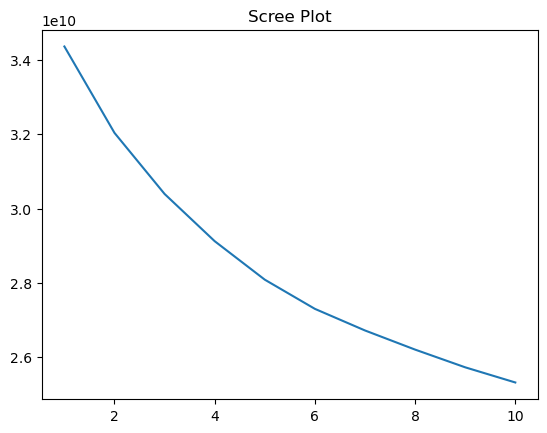

In [128]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(Z_test) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
    
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

It did NOT pick 10, likely due its tendency to combine the 1 and the 7 